In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Tarefa - Projeções e métricas
## PCC121 - Redes Complexas
Aluno: Gabriel F. Costa

# Questão 1

Pesos entre pessoas: [('P4', 'P2', {'weight': 1}), ('P4', 'P1', {'weight': 1}), ('P2', 'P3', {'weight': 1}), ('P2', 'P1', {'weight': 1}), ('P3', 'P1', {'weight': 1})]
Pesos entre sites: [('S3', 'S2', {'weight': 1}), ('S3', 'S1', {'weight': 1}), ('S2', 'S1', {'weight': 1})]


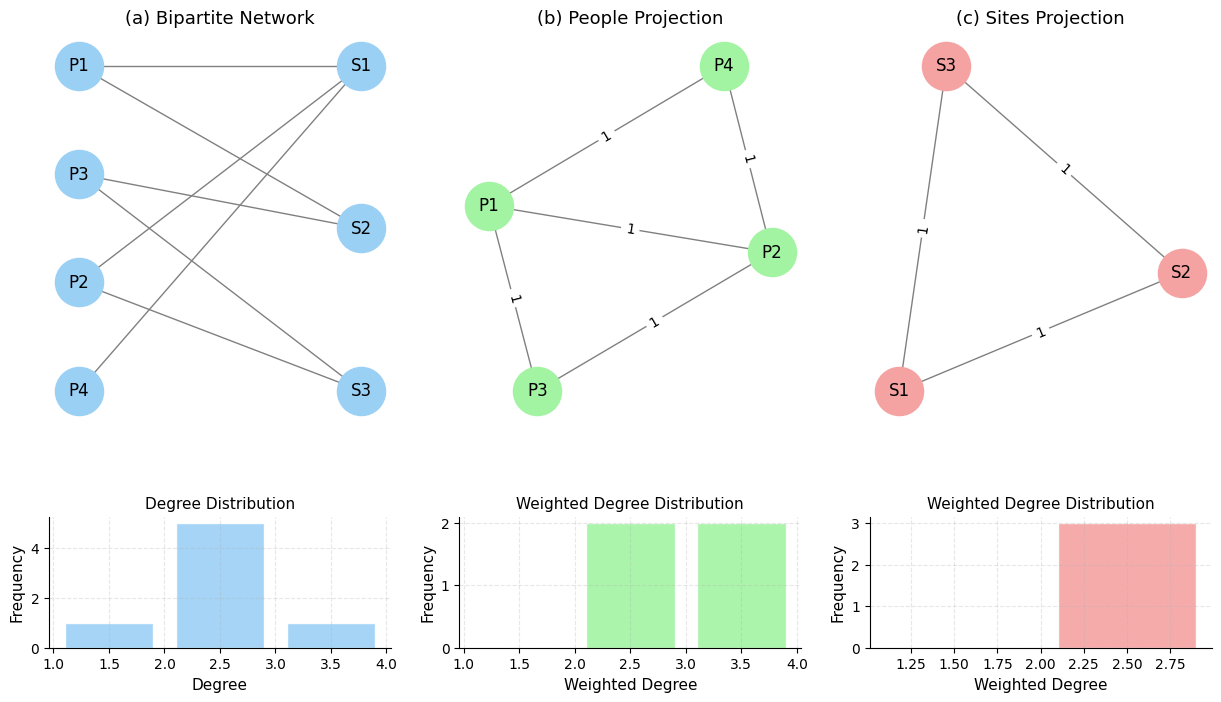

In [20]:
def generate_bipartite_projections(G, type_a, type_b):
    """
    Generate both weighted co-occurrence projections from a bipartite graph.

    This function receives a bipartite graph `G` where each node has the attribute
    'bipartite' indicating which set it belongs to (e.g., "person" or "site").
    It returns two weighted projections:
        - one for nodes of type `type_a`
        - another for nodes of type `type_b`
    In both cases, the edge weight corresponds to the number of shared neighbors
    between two nodes in the original bipartite graph.

    Parameters
    ----------
    G : networkx.Graph
        Bipartite graph containing the attribute 'bipartite' for all nodes.
    type_a : str
        Label used to identify the first group of nodes (e.g., "person").
    type_b : str
        Label used to identify the second group of nodes (e.g., "site").

    Returns
    -------
    G_a : networkx.Graph
        Weighted projection of nodes of type `type_a`. Each edge weight represents
        the number of common neighbors in the original bipartite graph.
    G_b : networkx.Graph
        Weighted projection of nodes of type `type_b`. Each edge weight represents
        the number of common neighbors in the original bipartite graph.

    Examples
    --------
    >>> B = nx.Graph()
    >>> B.add_nodes_from(["P1", "P2"], bipartite="person")
    >>> B.add_nodes_from(["S1", "S2"], bipartite="site")
    >>> B.add_edges_from([("P1", "S1"), ("P2", "S1"), ("P2", "S2")])
    >>> G_people, G_sites = generate_bipartite_projections(B, "person", "site")
    >>> print(G_people.edges(data=True))
    [('P1', 'P2', {'weight': 1})]
    """
    set_a = {n for n, d in G.nodes(data=True) if d.get("bipartite") == type_a}
    set_b = set(G) - set_a
    G_a = nx.bipartite.weighted_projected_graph(G, set_a)
    G_b = nx.bipartite.weighted_projected_graph(G, set_b)
    return G_a, G_b


def plot_bipartite_and_projections_with_histograms(B, G_a, G_b):
    """
    Plot a bipartite graph and its weighted projections, each with an aligned histogram.

    This function displays three networks side-by-side:
        (a) the original bipartite graph,
        (b) the weighted projection of type A nodes (e.g., people),
        (c) the weighted projection of type B nodes (e.g., sites).
    Each network has a corresponding degree distribution histogram below it,
    using consistent color coding and a clean academic-style layout.

    Parameters
    ----------
    B : networkx.Graph
        Original bipartite graph.
    G_a : networkx.Graph
        Weighted projection of type A nodes (e.g., people).
    G_b : networkx.Graph
        Weighted projection of type B nodes (e.g., sites).

    Notes
    -----
    - The bipartite layout (`nx.bipartite_layout`) is used for the original network.
    - Spring layouts (`nx.spring_layout`) are used for the projections.
    - Histograms display node degree distributions using the same color palette as
      their respective graphs.
    - Graphs are drawn with soft color tones, readable labels, and edge weights.

    Example
    -------
    >>> B = nx.Graph()
    >>> B.add_nodes_from(["P1", "P2", "P3"], bipartite="person")
    >>> B.add_nodes_from(["S1", "S2"], bipartite="site")
    >>> B.add_edges_from([("P1", "S1"), ("P1", "S2"), ("P2", "S2")])
    >>> G_people, G_sites = generate_bipartite_projections(B, "person", "site")
    >>> plot_bipartite_and_projections_with_histograms(B, G_people, G_sites)
    """
    fig, axes = plt.subplots(2, 3, figsize=(15, 8), gridspec_kw={"height_ratios": [3, 1]})
    plt.subplots_adjust(hspace=0.35)

    # === (a) Bipartite network ===
    ax_graph = axes[0, 0]
    ax_hist = axes[1, 0]
    persons = [n for n, d in B.nodes(data=True) if d["bipartite"] == "person"]
    pos = nx.bipartite_layout(B, persons)
    nx.draw(B, pos, with_labels=True, node_color="#9BD0F5", edge_color="gray", node_size=1200, ax=ax_graph)
    ax_graph.set_title("(a) Bipartite Network", fontsize=13)
    ax_graph.axis("off")

    degrees = [deg for _, deg in B.degree()]
    ax_hist.hist(degrees, bins=range(1, max(degrees)+2), color="#9BD0F5", edgecolor="white", alpha=0.9, rwidth=0.8)
    ax_hist.set_xlabel("Degree", fontsize=11)
    ax_hist.set_ylabel("Frequency", fontsize=11)
    ax_hist.set_title("Degree Distribution", fontsize=11)
    ax_hist.grid(alpha=0.3, linestyle="--")

    # === (b) People projection ===
    ax_graph = axes[0, 1]
    ax_hist = axes[1, 1]
    pos_a = nx.spring_layout(G_a, seed=42)
    nx.draw(G_a, pos_a, with_labels=True, node_color="#A2F3A2", node_size=1200, edge_color="gray", ax=ax_graph)
    labels_a = nx.get_edge_attributes(G_a, "weight")
    nx.draw_networkx_edge_labels(G_a, pos_a, edge_labels=labels_a, ax=ax_graph)
    ax_graph.set_title("(b) People Projection", fontsize=13)
    ax_graph.axis("off")

    weighted_degrees = [deg for _, deg in G_a.degree(weight="weight")]
    ax_hist.hist(weighted_degrees, bins=range(1, int(max(weighted_degrees))+2),
                 color="#A2F3A2", edgecolor="white", alpha=0.9, rwidth=0.8)
    ax_hist.set_xlabel("Weighted Degree", fontsize=11)
    ax_hist.set_ylabel("Frequency", fontsize=11)
    ax_hist.set_title("Weighted Degree Distribution", fontsize=11)
    ax_hist.grid(alpha=0.3, linestyle="--")

    # === (c) Sites projection ===
    ax_graph = axes[0, 2]
    ax_hist = axes[1, 2]
    pos_b = nx.spring_layout(G_b, seed=42)
    nx.draw(G_b, pos_b, with_labels=True, node_color="#F5A2A2", node_size=1200, edge_color="gray", ax=ax_graph)
    labels_b = nx.get_edge_attributes(G_b, "weight")
    nx.draw_networkx_edge_labels(G_b, pos_b, edge_labels=labels_b, ax=ax_graph)
    ax_graph.set_title("(c) Sites Projection", fontsize=13)
    ax_graph.axis("off")

    weighted_degrees_b = [deg for _, deg in G_b.degree(weight="weight")]
    ax_hist.hist(weighted_degrees_b, bins=range(1, int(max(weighted_degrees_b))+2),
                 color="#F5A2A2", edgecolor="white", alpha=0.9, rwidth=0.8)
    ax_hist.set_xlabel("Weighted Degree", fontsize=11)
    ax_hist.set_ylabel("Frequency", fontsize=11)
    ax_hist.set_title("Weighted Degree Distribution", fontsize=11)
    ax_hist.grid(alpha=0.3, linestyle="--")

    # Style adjustments for all histograms
    for ax in axes[1]:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', labelsize=10)

    plt.show()

# === Example network (like Figure 4.14a) ===
B = nx.Graph()
B.add_nodes_from(["P1", "P2", "P3", "P4"], bipartite="person")
B.add_nodes_from(["S1", "S2", "S3"], bipartite="site")
B.add_edges_from([
    ("P1", "S1"), ("P1", "S2"),
    ("P2", "S1"), ("P2", "S3"),
    ("P3", "S2"), ("P3", "S3"),
    ("P4", "S1")
])

G_people, G_sites = generate_bipartite_projections(B, "person", "site")

print("Pesos entre pessoas:", G_people.edges(data=True))
print("Pesos entre sites:", G_sites.edges(data=True))

plot_bipartite_and_projections_with_histograms(B, G_people, G_sites)

# Questão 2

In [23]:
def compute_network_metrics(G, name="Network"):
    """
    Compute key topological metrics for a given NetworkX graph.
    Includes: degree, strength (weighted degree), betweenness, and heterogeneity.
    """
    print(f"\n=== Métricas da {name} ===")

    # Degree (unweighted)
    degrees = dict(G.degree())

    # Strength (weighted degree) → soma dos pesos incidentes em cada nó
    strengths = dict(G.degree(weight="weight"))

    # Betweenness (considera pesos se existirem)
    if nx.is_weighted(G):
        betweenness = nx.betweenness_centrality(G, weight="weight", normalized=True)
    else:
        betweenness = nx.betweenness_centrality(G, normalized=True)

    # Heterogeneidade = var(k) / mean(k)^2
    k_vals = np.array(list(strengths.values()))  # usa strength, pois reflete peso
    heterogeneity = np.var(k_vals) / (np.mean(k_vals) ** 2) if np.mean(k_vals) != 0 else 0

    # Consolida resultados em DataFrame
    df = pd.DataFrame({
        "Node": list(G.nodes()),
        "Degree": [degrees[n] for n in G.nodes()],
        "Strength": [strengths[n] for n in G.nodes()],
        "Betweenness": [betweenness[n] for n in G.nodes()],
    })

    print(df.to_string(index=False))
    print(f"\n→ Parâmetro de heterogeneidade: H = {heterogeneity:.4f}")

    return df, heterogeneity


# === Usa as redes do exercício anterior ===
B = nx.Graph()
B.add_nodes_from(["P1", "P2", "P3", "P4"], bipartite="person")
B.add_nodes_from(["S1", "S2", "S3"], bipartite="site")
B.add_edges_from([
    ("P1", "S1"), ("P1", "S2"),
    ("P2", "S1"), ("P2", "S3"),
    ("P3", "S2"), ("P3", "S3"),
    ("P4", "S1")
])

# Projeções
set_persons = {n for n, d in B.nodes(data=True) if d["bipartite"] == "person"}
set_sites = set(B) - set_persons
G_people = nx.bipartite.weighted_projected_graph(B, set_persons)
G_sites = nx.bipartite.weighted_projected_graph(B, set_sites)

# Calcula métricas
df_B, H_B = compute_network_metrics(B, "Rede Bipartida")
df_P, H_P = compute_network_metrics(G_people, "Projeção das Pessoas")
df_S, H_S = compute_network_metrics(G_sites, "Projeção dos Sites")


=== Métricas da Rede Bipartida ===
Node  Degree  Strength  Betweenness
  P1       2         2     0.233333
  P2       2         2     0.233333
  P3       2         2     0.133333
  P4       1         1     0.000000
  S1       3         3     0.466667
  S2       2         2     0.166667
  S3       2         2     0.166667

→ Parâmetro de heterogeneidade: H = 0.0714

=== Métricas da Projeção das Pessoas ===
Node  Degree  Strength  Betweenness
  P4       2         2     0.000000
  P2       3         3     0.166667
  P3       2         2     0.000000
  P1       3         3     0.166667

→ Parâmetro de heterogeneidade: H = 0.0400

=== Métricas da Projeção dos Sites ===
Node  Degree  Strength  Betweenness
  S3       2         2          0.0
  S2       2         2          0.0
  S1       2         2          0.0

→ Parâmetro de heterogeneidade: H = 0.0000


|    **Rede**   | **Heterogeneidade (H)** |                                                                                        **Estrutura**                                                                                       |
| :-----------: | :---------------------: | :----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------: |
| **Bipartida** |        **0.0714**       |      Levemente desigual — o nó **S1** concentra a maior parte das conexões, atuando como **hub intermediário**. Ele maximiza o betweenness e liga indivíduos de diferentes subgrupos.      |
|  **Pessoas**  |        **0.0400**       |     Estrutura **moderadamente homogênea** — os indivíduos possuem graus e strengths semelhantes. **P1** e **P2** são ligeiramente mais centrais, conectando múltiplas tríades da rede.     |
|   **Sites**   |        **0.0000**       | Rede **completamente homogênea** — todos os sites compartilham o mesmo número de conexões (grau e strength idênticos). Estrutura **totalmente simétrica**, sem nós intermediários ou hubs. |
